In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [81]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,f_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [4]:
data = pd.read_csv('/home/family/Downloads/PianoTouch Toolbox/PianoTouch Toolbox/dataset.csv')

In [5]:
#data=pd.read_csv('/home/family/Documents/Performers/performer_dataset.csv')

In [6]:
data.head()

,Chord_onset,Number_of_Chords,Chord duration,max Amax,max MHV,Melody lead,Melody lead rate,Last-note trail,Last-note trail rate,IOI,...,DBH_STD_Note onset lag amount,DBH_STD_Note onset lag amount rate,DBH_STD_Note offset lead,DBH_STD_Note offset lead rate,DBH_STD_Note offset lead amount,DBH_STD_Note offset lead amount rate,DBH_STD_Sync rate,DBH_STD_Sync amount rate,Performer_id,Performer
0,305130.9229,3309,191.1967,202.5585,149.8477,22.4516,0.1579,68.0222,0.2942,165.3658,...,6.1485,0.0333,23.6909,0.0182,2.1020,0.0194,0.0103,0.0532,0,Frank_Dupree
1,75596.2746,1333,142.9962,179.7292,122.7487,57.6000,0.4336,84.7252,0.4790,113.1712,...,-2.5812,-0.0205,11.3967,-0.0244,3.1271,0.0485,0.0145,-0.0375,0,Frank_Dupree
2,55490.1577,241,746.9959,154.8382,99.8216,27.4435,0.1217,233.2174,0.3437,477.5333,...,5.8079,0.0046,107.8965,0.0405,10.7362,-0.0229,0.0675,0.0455,0,Frank_Dupree
3,64364.6919,1214,147.2208,190.6170,135.4423,66.1054,0.4952,86.6520,0.5387,116.4369,...,0.0770,0.0034,134.3480,-0.0129,-6.0544,0.0038,-0.0114,-0.0573,0,Frank_Dupree
4,52574.2314,121,979.6364,164.8926,109.3306,7.6596,0.0127,317.0000,0.1833,883.2167,...,2.0221,-0.0008,1387.0349,0.2051,3.7175,0.1245,0.1107,0.0135,0,Frank_Dupree


In [7]:
X = data.drop(['Performer_id', 'Performer','Chord_onset', 'Number_of_Chords', 'std_Chord_onset', 'Note_onset','STD_Note_onset','DBH_mean_Chord offset ','Note offset ','STD_Note offset ','LHM_Note offset ','LH_STD_Note offset ','RHM_Note offset ','RH_STD_Note offset ','DBH_Mean_Note offset '], axis=1)

In [8]:
y=data['Performer_id']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

### Constant feature removal

In [10]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [11]:
constant_filter.get_support().sum()

599

In [12]:
constant_list=[not temp for temp in constant_filter.get_support()]

In [13]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

### Quasi Constant feature removal

In [14]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [15]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [16]:
quasi_constant_filter.get_support().sum()

437

In [17]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

### Remove Duplicate features

In [18]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [19]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [20]:
X_train_T.duplicated().sum()

0

In [21]:
duplicated_features = X_train_T.duplicated()

In [22]:
features_to_keep = [not index for index in duplicated_features]

In [23]:
X_train_unique = X_train_T[features_to_keep].T

In [24]:
X_test_unique = X_test_T[features_to_keep].T

### Feature selection using Correlation

In [25]:
corrmat = X_train_unique.corr()

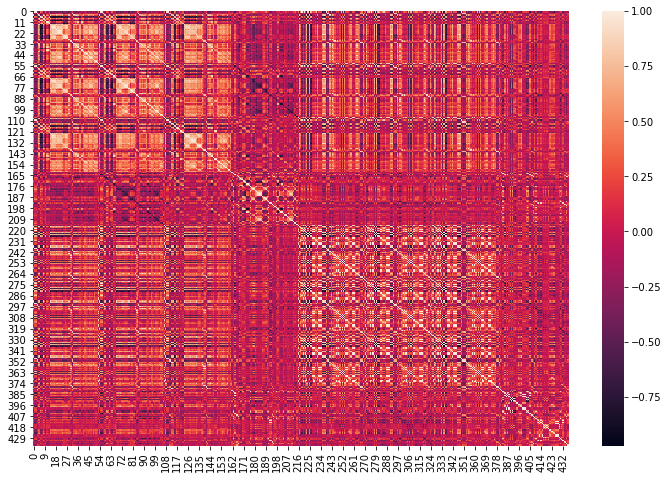

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [27]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
                

In [28]:
corr_features = get_correlation(X_train_unique, 0.85)

In [29]:
len(corr_features)

331

In [30]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

In [32]:
%%time
run_randomForest(X_train_uncorr,X_test_uncorr,y_train,y_test)

Accuracy on test set: 
0.6774193548387096
CPU times: user 339 ms, sys: 48.8 ms, total: 387 ms
Wall time: 465 ms


In [74]:
run_svm(X_train_uncorr,X_test_uncorr,y_train,y_test)

Accuracy on test set: 
0.3225806451612903


/home/family/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Feature Grouping and Feature Importance

In [33]:
corrdata = corrmat.abs().stack()

In [34]:
corrdata = corrdata.sort_values(ascending=False)

In [35]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]

In [36]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['Feature1', 'Feature2','Corr_value']

In [37]:
grouped_feature_list = []
corr_groups_list = []
for feature in corrdata.Feature1.unique():
    if feature not in grouped_feature_list:
        corr_block = corrdata[corrdata.Feature1==feature]
        grouped_feature_list = grouped_feature_list + list(corr_block.Feature2.unique()) + [feature]
        corr_groups_list.append(corr_block)

In [38]:
len(corr_groups_list)

102

### Feature importance based on tree based classifiers

In [39]:
important_features = []
for group in corr_groups_list:
    features = list(group.Feature1.unique())+list(group.Feature2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    rf.fit(X_train_unique[features],y_train)
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features','importance']
    importance.sort_values(by = 'importance', ascending=False, inplace=True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [40]:
important_features = pd.DataFrame(important_features)

In [41]:
important_features.reset_index(inplace=True, drop = True)

In [42]:
features_to_consider = set(important_features['features'])

In [43]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [44]:
features_to_discard = list(features_to_discard)

In [45]:
X_train_grouped_uncorr = X_train_unique.drop(labels= features_to_discard, axis = 1)

In [46]:
X_train_grouped_uncorr.shape

(124, 173)

In [47]:
X_test_grouped_uncorr = X_test_unique.drop(labels= features_to_discard, axis = 1)

In [48]:
X_test_grouped_uncorr.shape

(31, 173)

In [49]:
%%time
run_randomForest(X_train_grouped_uncorr,X_test_grouped_uncorr,y_train,y_test)

Accuracy on test set: 
0.7419354838709677
CPU times: user 319 ms, sys: 82.5 ms, total: 401 ms
Wall time: 363 ms


In [83]:
run_MLP(X_train_grouped_uncorr,X_test_grouped_uncorr,y_train,y_test)

Accuracy on test set: 
0.1935483870967742


### Feature selection using Mutual Information Gain

In [50]:
mi = mutual_info_classif(X_train_unique,y_train)

In [51]:
len(mi)

437

In [52]:
mi = pd.Series(mi)
mi.index=X_train_unique.columns

In [53]:
mi.sort_values(ascending=False, inplace=True)

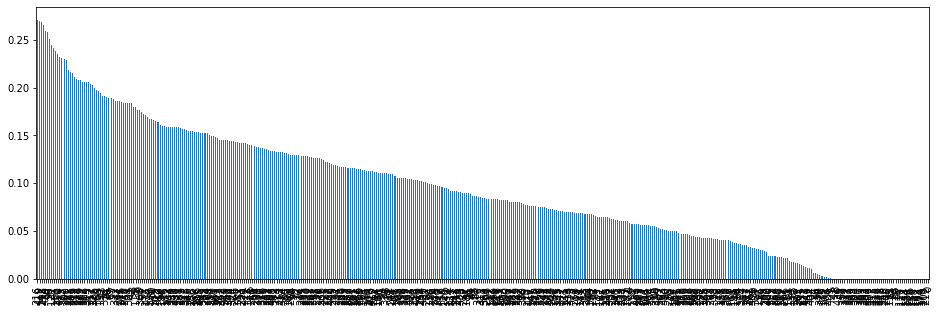

In [54]:
mi.plot.bar(figsize=(16,5))

In [55]:
sel = SelectPercentile(mutual_info_classif,percentile=10).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  7,  10,  13,  32,  43,  46,  47,  60,  67,  93,  96, 107, 110,
            111, 127, 129, 139, 141, 216, 219, 228, 229, 230, 243, 251, 276,
            298, 300, 302, 304, 305, 307, 313, 315, 316, 317, 322, 326, 331,
            350, 369, 419, 424, 434],
           dtype='int64')

In [56]:
len(X_train_unique.columns[sel.get_support()])

44

In [57]:
colnames= list(X.columns[X_train_unique.columns[sel.get_support()]])

In [58]:
len(colnames)

44

In [59]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi=sel.transform(X_test_unique)

In [60]:
X_train_mi.shape

(124, 44)

In [61]:
%%time
run_randomForest(X_train_mi,X_test_mi,y_train,y_test)

Accuracy on test set: 
0.5161290322580645
CPU times: user 340 ms, sys: 34.1 ms, total: 375 ms
Wall time: 462 ms


### Feature selection using one way ANOVA test

In [62]:
sl = f_classif(X_train_unique, y_train)

In [63]:
p_values = pd.Series(sl[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending=True, inplace=True)

In [84]:
#p_values.plot.bar(figsize=(16,5))

In [65]:
p_values=p_values[p_values<0.05]

In [66]:
p_values.index

Int64Index([273, 287, 298, 300, 424, 419, 243, 433, 274, 286,
            ...
              9, 376, 338, 339, 166, 392, 322,   7, 390,  18],
           dtype='int64', length=147)

In [67]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

In [68]:
%%time
run_randomForest(X_train_p,X_test_p,y_train,y_test)

Accuracy on test set: 
0.6451612903225806
CPU times: user 445 ms, sys: 38 ms, total: 483 ms
Wall time: 464 ms


### Classification and Accuracy

In [31]:
def run_randomForest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [76]:
def run_svm(X_train,X_test,y_train,y_test):
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [79]:
def run_nb(X_train,X_test,y_train,y_test):
    clf =GaussianNB()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [82]:
def run_MLP(X_train,X_test,y_train,y_test):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 4), random_state=1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train,X_test,y_train,y_test)